In [ ]:
!wget https://machinehack-be.s3.amazonaws.com/news_popularity_prediction_weekend_hackathon_14/Wk%2314-Dataset.zip

--2020-08-02 20:12:33--  https://machinehack-be.s3.amazonaws.com/news_popularity_prediction_weekend_hackathon_14/Wk%2314-Dataset.zip
Resolving machinehack-be.s3.amazonaws.com (machinehack-be.s3.amazonaws.com)... 52.219.62.116
Connecting to machinehack-be.s3.amazonaws.com (machinehack-be.s3.amazonaws.com)|52.219.62.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6884183 (6.6M) [application/zip]
Saving to: ‘Wk#14-Dataset.zip’

Wk#14-Dataset.zip   100%[===================>]   6.56M  3.50MB/s    in 1.9s    

2020-08-02 20:12:36 (3.50 MB/s) - ‘Wk#14-Dataset.zip’ saved [6884183/6884183]



In [ ]:
!unzip Wk#14-Dataset.zip

Archive:  Wk#14-Dataset.zip
  inflating: Train.csv               
  inflating: __MACOSX/._Train.csv    
  inflating: Test.csv                
  inflating: __MACOSX/._Test.csv     
  inflating: sample_submission.csv   
  inflating: __MACOSX/._sample_submission.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [ ]:
train.head(5)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,9.0,286.0,0.552727,1.0,0.612903,6.0,4.0,2.0,1.0,4.702797,9.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,519.0,110.125000,0.0,843300.0,401655.555556,0.000000,4020.494845,2770.929395,2000.0,13900.0,7950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.022280,0.022225,0.022250,0.022223,0.911021,0.433628,0.267172,0.048951,0.000000,1.000000,0.000000,0.343506,0.136364,1.0,0.000000,0.0,0.00,0.000000,0.000000,0.500000,0.000000,4751.0
1,10.0,96.0,0.702128,1.0,0.796875,4.0,3.0,10.0,1.0,4.458333,8.0,0.0,0.0,0.0,0.0,0.0,0.0,217.0,900.0,399.250000,4400.0,80400.0,39962.500000,2042.608696,3366.920455,2917.842715,2600.0,2600.0,2600.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.025174,0.025050,0.025010,0.899733,0.025033,0.733333,0.040000,0.041667,0.020833,0.666667,0.333333,0.425000,0.200000,0.5,-0.650000,-0.7,-0.60,1.000000,0.500000,0.500000,0.500000,1821.0
2,9.0,399.0,0.675532,1.0,0.813433,21.0,1.0,20.0,0.0,4.859649,9.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,413.0,163.750000,0.0,843300.0,277655.555556,0.000000,8974.234069,4570.544961,23700.0,23700.0,23700.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181856,0.022235,0.140076,0.632909,0.022924,0.356277,0.079883,0.027569,0.020050,0.578947,0.421053,0.312613,0.100000,0.6,-0.180208,-0.4,-0.10,0.535714,0.285714,0.035714,0.285714,1420.0
3,11.0,1388.0,0.482156,1.0,0.685446,40.0,4.0,2.0,5.0,4.562680,10.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,478.0,52.222222,0.0,843300.0,230180.000000,0.000000,4916.285714,3270.495273,1400.0,1400.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.566989,0.021543,0.219971,0.020043,0.171454,0.446667,0.174293,0.046830,0.013689,0.773810,0.226190,0.363141,0.033333,1.0,-0.260965,-0.5,-0.05,1.000000,-0.500000,0.500000,0.500000,52.0
4,12.0,499.0,0.564682,1.0,0.752508,10.0,0.0,1.0,0.0,4.961924,7.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,1300.0,283.000000,0.0,843300.0,233657.142857,0.000000,3960.285714,2382.862218,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028579,0.028580,0.388730,0.168016,0.386094,0.527349,0.147923,0.062124,0.014028,0.815789,0.184211,0.291111,0.100000,0.6,-0.195238,-0.4,-0.10,0.650000,0.350000,0.150000,0.350000,4182.0


In [ ]:
test.head(5)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,325.0,0.627832,1.0,0.700461,16.0,3.0,13.0,1.0,4.600000,10.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,508.0,107.459000,967.0,843300.0,414896.700000,737.500000,7178.356113,4326.293570,39700.0,47100.0,43400.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020872,0.020279,0.020127,0.917571,0.021151,0.681302,0.021247,0.046154,0.021538,0.681818,0.318182,0.332828,0.050000,0.70,-0.510714,-1.0,-0.333333,1.0,-1.0,0.5,1.0
1,10.0,592.0,0.606272,1.0,0.798343,18.0,4.0,10.0,1.0,4.778716,7.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,97.0,56.500000,0.0,843300.0,607757.142857,0.000000,6517.803738,3869.691981,4300.0,15000.0,9650.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029281,0.028723,0.028694,0.884719,0.028583,0.423597,0.188833,0.070946,0.015203,0.823529,0.176471,0.351263,0.033333,1.00,-0.187191,-0.3,-0.100000,0.0,0.0,0.5,0.0
2,11.0,839.0,0.333742,1.0,0.414498,1.0,0.0,22.0,2.0,4.740167,7.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,799.0,224.200000,0.0,843300.0,157592.857143,0.000000,3401.039067,1560.614857,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.028583,0.029225,0.252384,0.028622,0.661186,0.269545,-0.004740,0.009535,0.010727,0.470588,0.529412,0.213636,0.100000,0.50,-0.208333,-0.3,-0.125000,0.4,-0.2,0.1,0.2
3,7.0,412.0,0.562963,1.0,0.730924,15.0,11.0,1.0,1.0,4.932039,7.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,884.0,276.857143,2200.0,843300.0,231500.000000,1042.500000,3602.687887,2280.321027,308.0,1600.0,1229.714286,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.028572,0.028572,0.885712,0.028572,0.028573,0.372765,0.014621,0.021845,0.016990,0.562500,0.437500,0.273232,0.100000,0.75,-0.280952,-0.5,-0.100000,0.0,0.0,0.5,0.0
4,14.0,762.0,0.473475,1.0,0.660465,11.0,3.0,1.0,1.0,4.604987,6.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,436.0,72.000000,3400.0,843300.0,297333.333333,1306.347826,3483.555762,2477.068440,964.0,1800.0,1421.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.533093,0.366856,0.033334,0.033335,0.033383,0.461811,0.175506,0.057743,0.019685,0.745763,0.254237,0.387689,0.100000,0.60,-0.231759,-0.4,-0.033333,0.4,0.1,0.1,0.1


In [ ]:
train.isnull().sum(),test.isnull().sum(),train.shape,test.shape,train.dtypes

(n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                       0
 self_reference_min_shares        0
 self_reference_max_shares  

In [ ]:
train.nunique()

n_tokens_title                     16
n_tokens_content                 1583
n_unique_tokens                  7073
n_non_stop_words                 1075
n_non_stop_unique_tokens         6639
num_hrefs                         102
num_self_hrefs                     47
num_imgs                           68
num_videos                         36
average_token_length             7134
num_keywords                       10
data_channel_is_lifestyle           2
data_channel_is_entertainment       2
data_channel_is_bus                 2
data_channel_is_socmed              2
data_channel_is_tech                2
data_channel_is_world               2
kw_min_min                         12
kw_max_min                        897
kw_avg_min                       5745
kw_min_max                        618
kw_max_max                         18
kw_avg_max                       7393
kw_min_avg                       3923
kw_max_avg                       5747
kw_avg_avg                       7902
self_referen

In [ ]:
train_df=train
test_df=test

In [ ]:
X = train_df.drop(labels=['shares'], axis=1)
y = train_df['shares'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.10, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((7135, 58), (7135,), (793, 58), (793,))

In [ ]:
from math import sqrt 
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

In [ ]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'boosting': 'dart',  
         'metric': 'l2_root',
         'learning_rate': 0.01, 
         'num_iterations': 1000,
         'num_leaves': 300,
         'max_depth': -1,
         'min_data_in_leaf': 11,
         'bagging_fraction': 0.90,
         'bagging_freq': 2,
         'bagging_seed': 3,
         'feature_fraction': 0.90,
         'feature_fraction_seed': 2,
         'early_stopping_round': 200,
         'max_bin': 200
         }

lgbm = lgb.train(params=param, verbose_eval=100, train_set=train_data, valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_cv)
print('RMSLE:', mean_absolute_error(y_cv,y_pred_lgbm))

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid_0's rmse: 17529.5
[200]	valid_0's rmse: 17205.9
[300]	valid_0's rmse: 16874.1
[400]	valid_0's rmse: 16690
[500]	valid_0's rmse: 16545.6
[600]	valid_0's rmse: 16616.3
[700]	valid_0's rmse: 16539.4
[800]	valid_0's rmse: 16646.5
[900]	valid_0's rmse: 16722
[1000]	valid_0's rmse: 16740.2
RMSLE: 6996.338586829377


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


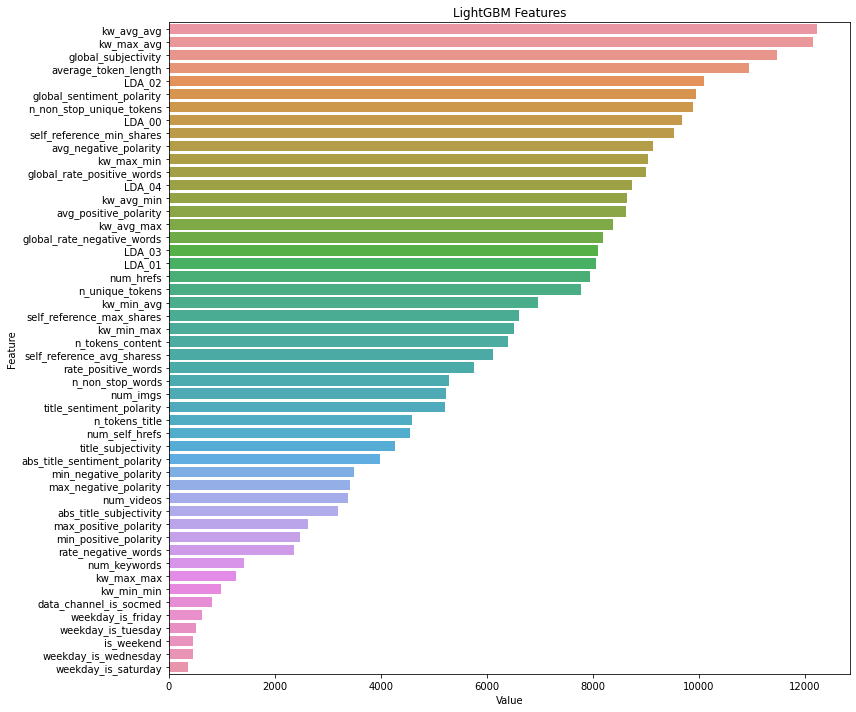

In [ ]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [ ]:
Xtest = test_df

In [ ]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lgbm = LGBMRegressor(**param)
    #lgbm = LGBMRegressor(boosting='gbdt',learning_rate=0.01, n_estimators=10000, random_state=101, subsample=0.9)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=200)

    y_pred_lgbm = lgbm.predict(X_test)
    print("RMSLE LGBM: ", mean_absolute_error(y_test, y_pred_lgbm))

    errlgb.append(mean_absolute_error(y_test,y_pred_lgbm))
    p = lgbm.predict(Xtest)
    y_pred_totlgb.append(p)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


RMSLE LGBM:  7000.181817530303


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


RMSLE LGBM:  7655.233044356312


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


RMSLE LGBM:  8615.447108432314


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


RMSLE LGBM:  6512.627874514213


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


RMSLE LGBM:  6701.115156943324


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


RMSLE LGBM:  7527.487522480309


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


RMSLE LGBM:  6463.057861198569


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


RMSLE LGBM:  6728.211732324607


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


RMSLE LGBM:  7792.989496701613


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


RMSLE LGBM:  8103.365214865229


In [ ]:
np.mean(errlgb,0)

7309.97168293468

In [ ]:
lgbm_final = np.mean(y_pred_totlgb,0)
lgbm_final

array([14766.2170177 ,  9042.03069532,  5635.58070777, ...,
        5852.69905945,  5551.51442356,  5760.24364865])

In [ ]:
submission = pd.DataFrame({
        "shares":(lgbm_final)
    })
submission.to_csv('./log_t.csv', index=False)
print(submission)

         shares
0      9.600165
1      9.109750
2      8.637033
3      8.535877
4      8.506043
...         ...
31711  8.952863
31712  8.783014
31713  8.674829
31714  8.622006
31715  8.658909

[31716 rows x 1 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log1p
  


In [ ]:
from google.colab import files
files.download('log_t.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>